In [179]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations
import numpy as np
from scipy.stats import chi2_contingency

In [3]:
raw_df = pd.read_csv("C:/Users/Janak ARORA/Desktop/Ironhack_files/Final_project/tripadvisor_restaurants_analysis/data/raw/tripadvisor_european_restaurants.csv")
raw_df

C:\Users\Janak ARORA\AppData\Local\Temp\ipykernel_32624\1584553594.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv("C:/Users/Janak ARORA/Desktop/Ironhack_files/Final_project/tripadvisor_restaurants_analysis/data/raw/tripadvisor_european_restaurants.csv")


,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,...,2.0,0.0,0.0,0.0,0.0,4.0,4.5,4.0,NaN,NaN
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,...,2.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,g10002858-d4586832,Au Bout du Pont,"[""Europe"", ""France"", ""Centre-Val de Loire"", ""B...",France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",46.635895,1.386133,...,3.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,g10002986-d3510044,Le Relais de Naiade,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Co...",France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",45.642610,1.824460,...,1.0,0.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN
4,g10022428-d9767191,Relais Du MontSeigne,"[""Europe"", ""France"", ""Occitanie"", ""Aveyron"", ""...",France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",44.208860,2.960470,...,4.0,7.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083392,g9710275-d10770782,Complex Popas Pacurari,"[""Europe"", ""Romania"", ""Northeast Romania"", ""Ia...",Romania,Northeast Romania,Iasi County,NaN,"Soseaua Pacurari, Valea Lupului 707410 Romania",47.172950,27.519110,...,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
1083393,g9716321-d15026574,Casa Pastravarului DORIPESCO,"[""Europe"", ""Romania"", ""Transylvania"", ""Central...",Romania,Transylvania,Brasov County,Apata,"DN 13 Judetul Kilometrul 33 Maierus, Apata 507...",45.904423,25.470509,...,0.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN
1083394,g9722813-d15891057,Hanul Tentea,"[""Europe"", ""Romania"", ""Transylvania"", ""Northwe...",Romania,Transylvania,Maramures County,Sacel,"DN17C, Sacel Romania",47.631920,24.450910,...,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
1083395,g9726871-d21391722,Casa Paduraru,"[""Europe"", ""Romania"", ""Southern Romania"", ""Arg...",Romania,Southern Romania,Arges County,NaN,"Sat. Argeselu Numarul 432, Maracineni 117450 R...",44.918950,24.867634,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
raw_df.columns

Index(['restaurant_link', 'restaurant_name', 'original_location', 'country',
       'region', 'province', 'city', 'address', 'latitude', 'longitude',
       'claimed', 'awards', 'popularity_detailed', 'popularity_generic',
       'top_tags', 'price_level', 'price_range', 'meals', 'cuisines',
       'special_diets', 'features', 'vegetarian_friendly', 'vegan_options',
       'gluten_free', 'original_open_hours', 'open_days_per_week',
       'open_hours_per_week', 'working_shifts_per_week', 'avg_rating',
       'total_reviews_count', 'default_language',
       'reviews_count_in_default_language', 'excellent', 'very_good',
       'average', 'poor', 'terrible', 'food', 'service', 'value', 'atmosphere',
       'keywords'],
      dtype='object')

In [172]:
raw_df["default_language"].unique()

array(['English', 'All languages', nan], dtype=object)

In [ ]:
# color = ["#335962", "#90bdc8"]

#### Combine columns to single value

In [5]:
raw_df['country'] = raw_df['country'].replace({
    'England': 'United Kingdom',
    'Northern Ireland': 'United Kingdom',
    'Scotland': 'United Kingdom',
    'Wales': 'United Kingdom'
})

In [6]:
filtered_df = raw_df[raw_df["country"].isin(["France", "United Kingdom"])]
filtered_df = filtered_df.reset_index(drop=True)
filtered_df

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,...,2.0,0.0,0.0,0.0,0.0,4.0,4.5,4.0,NaN,NaN
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,...,2.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,g10002858-d4586832,Au Bout du Pont,"[""Europe"", ""France"", ""Centre-Val de Loire"", ""B...",France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",46.635895,1.386133,...,3.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,g10002986-d3510044,Le Relais de Naiade,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Co...",France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",45.642610,1.824460,...,1.0,0.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN
4,g10022428-d9767191,Relais Du MontSeigne,"[""Europe"", ""France"", ""Occitanie"", ""Aveyron"", ""...",France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",44.208860,2.960470,...,4.0,7.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326947,g9977992-d17830643,Domino's Pizza,"[""Europe"", ""United Kingdom (UK)"", ""England"", ""...",United Kingdom,Yorkshire,North Yorkshire,Goole,"49-51 Boothferry Road, Goole DN14 5DE England",53.704323,-0.873573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
326948,g9977992-d20042023,Subway,"[""Europe"", ""United Kingdom (UK)"", ""England"", ""...",United Kingdom,Yorkshire,North Yorkshire,Goole,"Rawcliffe Road, Goole DN14 8JS England",53.706192,-0.914828,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
326949,g9977992-d21332796,The Kings Arms,"[""Europe"", ""United Kingdom (UK)"", ""England"", ""...",United Kingdom,Yorkshire,North Yorkshire,Goole,"Marsh Lane, Goole DN14 0SL England",53.730110,-1.156390,...,2.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
326950,g9977998-d4343758,Java Bar,"[""Europe"", ""United Kingdom (UK)"", ""England"", ""...",United Kingdom,Yorkshire,North Yorkshire,Rawcliffe,"18 Eastholme Drive, Rawcliffe, York YO30 5SW E...",53.979576,-1.107181,...,4.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


#### Dropping Columns

In [7]:
filtered_df = filtered_df.drop(columns=['original_location', 'open_hours_per_week', 'popularity_detailed', 'popularity_generic', 'restaurant_link','working_shifts_per_week', 'price_level', 'region', 'province', 'address', 'atmosphere', 'keywords','value', 'very_good', 'average', 'poor', 'food', 'service', 'reviews_count_in_default_language'])
filtered_df

,restaurant_name,country,city,latitude,longitude,claimed,awards,top_tags,price_range,meals,...,vegetarian_friendly,vegan_options,gluten_free,original_open_hours,open_days_per_week,avg_rating,total_reviews_count,default_language,excellent,terrible
0,Le 147,France,Saint-Jouvent,45.961674,1.169131,Claimed,NaN,"Cheap Eats, French",NaN,"Lunch, Dinner",...,N,N,N,NaN,NaN,4.0,36.0,English,2.0,0.0
1,Le Saint Jouvent,France,Saint-Jouvent,45.957040,1.205480,Unclaimed,NaN,Cheap Eats,NaN,NaN,...,N,N,N,NaN,NaN,4.0,5.0,All languages,2.0,0.0
2,Au Bout du Pont,France,Rivarennes,46.635895,1.386133,Claimed,NaN,"Cheap Eats, French, European",NaN,"Dinner, Lunch, Drinks",...,N,N,N,NaN,NaN,5.0,13.0,English,3.0,0.0
3,Le Relais de Naiade,France,Lacelle,45.642610,1.824460,Claimed,NaN,"Cheap Eats, French",NaN,"Lunch, Dinner",...,N,N,N,NaN,NaN,4.0,34.0,English,1.0,0.0
4,Relais Du MontSeigne,France,Saint-Laurent-de-Levezou,44.208860,2.960470,Unclaimed,NaN,"Mid-range, French",NaN,"Lunch, Dinner",...,N,N,N,NaN,NaN,4.5,11.0,All languages,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326947,Domino's Pizza,United Kingdom,Goole,53.704323,-0.873573,Unclaimed,NaN,NaN,NaN,"Lunch, Dinner",...,N,N,N,"{""Mon"": [""11:00-23:00""], ""Tue"": [""11:00-23:00""...",7.0,NaN,0.0,NaN,NaN,NaN
326948,Subway,United Kingdom,Goole,53.706192,-0.914828,Unclaimed,NaN,NaN,NaN,"Lunch, Dinner",...,N,N,N,"{""Mon"": [""10:00-16:00""], ""Tue"": [""10:00-16:00""...",7.0,NaN,0.0,NaN,NaN,NaN
326949,The Kings Arms,United Kingdom,Goole,53.730110,-1.156390,Claimed,NaN,"Mid-range, European",€12-€23,"Lunch, Dinner, Drinks",...,N,N,N,"{""Mon"": [""16:00-22:00""], ""Tue"": [""16:00-22:00""...",7.0,5.0,2.0,English,2.0,0.0
326950,Java Bar,United Kingdom,Rawcliffe,53.979576,-1.107181,Claimed,NaN,Cafe,NaN,"Breakfast, Lunch",...,N,N,N,"{""Mon"": [""07:00-14:00""], ""Tue"": [""07:00-14:00""...",5.0,5.0,5.0,English,4.0,0.0


#### Filling Null values

In [8]:
filtered_df.isna().sum()

restaurant_name             0
country                     0
city                    31193
latitude                 3392
longitude                3392
claimed                   498
awards                 231145
top_tags                30305
price_range            229818
meals                  113215
cuisines                46907
special_diets          220912
features               216588
vegetarian_friendly         0
vegan_options               0
gluten_free                 0
original_open_hours    115277
open_days_per_week     115277
avg_rating              24219
total_reviews_count     14081
default_language        23775
excellent               23775
terrible                23775
dtype: int64

In [9]:
filtered_df = filtered_df.assign(
    claimed = filtered_df['claimed'].fillna('Unknown'),
    city = filtered_df['city'].fillna('Unknown'),
    latitude = filtered_df['latitude'].fillna('Unknown'),
    longitude = filtered_df['longitude'].fillna('Unknown'),
    awards = filtered_df['awards'].fillna('Unknown'),
    top_tags = filtered_df['top_tags'].fillna('Unknown'),
    price_range = filtered_df['price_range'].fillna('Not Available'),
    meals = filtered_df['meals'].fillna('Unknown'),
    cuisines = filtered_df['cuisines'].fillna('Unknown'),
    special_diets = filtered_df['special_diets'].fillna('Unknown'),
    features = filtered_df['features'].fillna('Unknown'),
    avg_rating = filtered_df['avg_rating'].fillna(filtered_df['avg_rating'].median()),
    original_open_hours = filtered_df['original_open_hours'].fillna('Unknown'),
    open_days_per_week = filtered_df['open_days_per_week'].fillna('Unknown'),
    total_reviews_count = filtered_df['total_reviews_count'].fillna(0),
    default_language = filtered_df['default_language'].fillna('Unknown'),
    excellent = filtered_df['excellent'].fillna('Unknown'),
    terrible = filtered_df['terrible'].fillna('Unknown')
)

In [10]:
filtered_df.isna().sum()

restaurant_name        0
country                0
city                   0
latitude               0
longitude              0
claimed                0
awards                 0
top_tags               0
price_range            0
meals                  0
cuisines               0
special_diets          0
features               0
vegetarian_friendly    0
vegan_options          0
gluten_free            0
original_open_hours    0
open_days_per_week     0
avg_rating             0
total_reviews_count    0
default_language       0
excellent              0
terrible               0
dtype: int64

#### Checking Data Types

In [11]:
filtered_df.dtypes

restaurant_name         object
country                 object
city                    object
latitude                object
longitude               object
claimed                 object
awards                  object
top_tags                object
price_range             object
meals                   object
cuisines                object
special_diets           object
features                object
vegetarian_friendly     object
vegan_options           object
gluten_free             object
original_open_hours     object
open_days_per_week      object
avg_rating             float64
total_reviews_count    float64
default_language        object
excellent               object
terrible                object
dtype: object

In [160]:
filtered_df['vegetarian_friendly'].unique()

array(['n', 'y'], dtype=object)

In [12]:
filtered_df.duplicated().sum()

np.int64(0)

#### Final Dataset 

In [13]:
filtered_df

,restaurant_name,country,city,latitude,longitude,claimed,awards,top_tags,price_range,meals,...,vegetarian_friendly,vegan_options,gluten_free,original_open_hours,open_days_per_week,avg_rating,total_reviews_count,default_language,excellent,terrible
0,Le 147,France,Saint-Jouvent,45.961674,1.169131,Claimed,Unknown,"Cheap Eats, French",Not Available,"Lunch, Dinner",...,N,N,N,Unknown,Unknown,4.0,36.0,English,2.0,0.0
1,Le Saint Jouvent,France,Saint-Jouvent,45.95704,1.20548,Unclaimed,Unknown,Cheap Eats,Not Available,Unknown,...,N,N,N,Unknown,Unknown,4.0,5.0,All languages,2.0,0.0
2,Au Bout du Pont,France,Rivarennes,46.635895,1.386133,Claimed,Unknown,"Cheap Eats, French, European",Not Available,"Dinner, Lunch, Drinks",...,N,N,N,Unknown,Unknown,5.0,13.0,English,3.0,0.0
3,Le Relais de Naiade,France,Lacelle,45.64261,1.82446,Claimed,Unknown,"Cheap Eats, French",Not Available,"Lunch, Dinner",...,N,N,N,Unknown,Unknown,4.0,34.0,English,1.0,0.0
4,Relais Du MontSeigne,France,Saint-Laurent-de-Levezou,44.20886,2.96047,Unclaimed,Unknown,"Mid-range, French",Not Available,"Lunch, Dinner",...,N,N,N,Unknown,Unknown,4.5,11.0,All languages,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326947,Domino's Pizza,United Kingdom,Goole,53.704323,-0.873573,Unclaimed,Unknown,Unknown,Not Available,"Lunch, Dinner",...,N,N,N,"{""Mon"": [""11:00-23:00""], ""Tue"": [""11:00-23:00""...",7.0,4.0,0.0,Unknown,Unknown,Unknown
326948,Subway,United Kingdom,Goole,53.706192,-0.914828,Unclaimed,Unknown,Unknown,Not Available,"Lunch, Dinner",...,N,N,N,"{""Mon"": [""10:00-16:00""], ""Tue"": [""10:00-16:00""...",7.0,4.0,0.0,Unknown,Unknown,Unknown
326949,The Kings Arms,United Kingdom,Goole,53.73011,-1.15639,Claimed,Unknown,"Mid-range, European",€12-€23,"Lunch, Dinner, Drinks",...,N,N,N,"{""Mon"": [""16:00-22:00""], ""Tue"": [""16:00-22:00""...",7.0,5.0,2.0,English,2.0,0.0
326950,Java Bar,United Kingdom,Rawcliffe,53.979576,-1.107181,Claimed,Unknown,Cafe,Not Available,"Breakfast, Lunch",...,N,N,N,"{""Mon"": [""07:00-14:00""], ""Tue"": [""07:00-14:00""...",5.0,5.0,5.0,English,4.0,0.0


In [14]:
filtered_df.columns

Index(['restaurant_name', 'country', 'city', 'latitude', 'longitude',
       'claimed', 'awards', 'top_tags', 'price_range', 'meals', 'cuisines',
       'special_diets', 'features', 'vegetarian_friendly', 'vegan_options',
       'gluten_free', 'original_open_hours', 'open_days_per_week',
       'avg_rating', 'total_reviews_count', 'default_language', 'excellent',
       'terrible'],
      dtype='object')

In [184]:
# Predict Avg Rating (Indian/veg): target column 
# separate models for both countries
# single model 

#### Keep Only First Cuisine

In [ ]:
# Ensure cuisines is string
filtered_df["cuisines"] = filtered_df["cuisines"].astype(str)

# Keep only the first cuisine
filtered_df["primary_cuisine"] = filtered_df["cuisines"].str.split(",").str[0].str.strip()

# Preview result
filtered_df[["cuisines", "primary_cuisine"]].head()

#### Exporting to csv file

In [ ]:
filtered_df.to_csv("clean_data.csv", index=False)

### ANALYSIS

#### Number of restaurants by country and city

In [15]:
# Count restaurants by country
restaurants_by_country = (
    filtered_df.groupby("country")
    .size()
    .reset_index(name="number_of_restaurants")
    .sort_values("number_of_restaurants", ascending=False)
)
restaurants_by_country.head()

,country,number_of_restaurants
1,United Kingdom,171664
0,France,155288


In [ ]:
"""
The dataset is dominated by two countries:
United Kingdom: 171,664 restaurants
France: 155,288 restaurants

Insights

Coverage between the UK and France is relatively balanced, with the UK having ~10% more entries.
"""

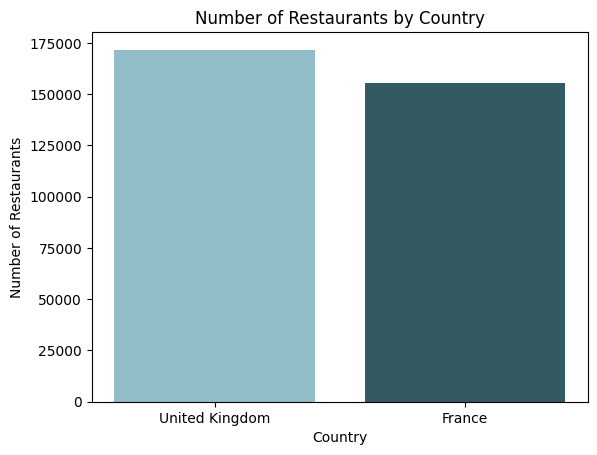

In [16]:
# Plot 1: Restaurants by country
plt.figure()
plt.bar(restaurants_by_country["country"], restaurants_by_country["number_of_restaurants"], color = ["#90bdc8", "#335962"])
plt.title("Number of Restaurants by Country")
plt.xlabel("Country")
plt.ylabel("Number of Restaurants")
plt.show()

In [75]:
# Count restaurants by city
"""
restaurants_by_city = (
    filtered_df.groupby(["country", "city"])
    .size()
    .reset_index(name="number_of_restaurants")
    .sort_values("number_of_restaurants", ascending=False)
)
"""

restaurants_by_city = (
    filtered_df[filtered_df["city"] != "Unknown"]
    .groupby(["country", "city"])
    .size()
    .reset_index(name="number_of_restaurants")
    .sort_values("number_of_restaurants", ascending=False)
)
restaurants_by_city.head(10)

,country,city,number_of_restaurants
9416,France,Paris,18129
7517,France,Lyon,2930
7819,France,Marseille,2416
19336,United Kingdom,Manchester,2376
15367,United Kingdom,Birmingham,2371
8990,France,Nice,1901
13478,France,Toulouse,1869
18977,United Kingdom,Liverpool,1869
1534,France,Bordeaux,1801
18829,United Kingdom,Leeds,1592


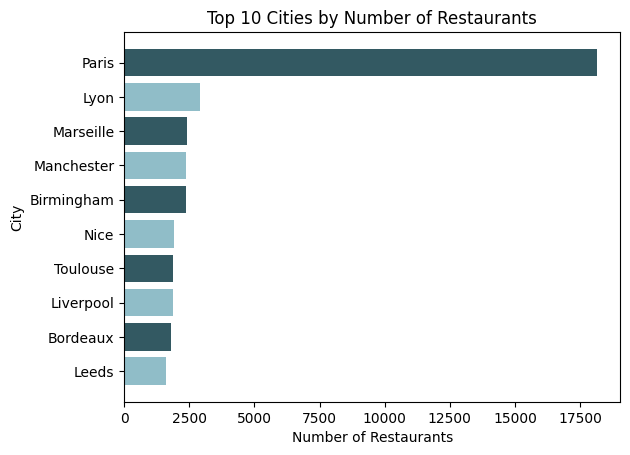

In [76]:
plt.figure()
plt.barh(restaurants_by_city["city"].head(10), restaurants_by_city["number_of_restaurants"].head(10), color = ["#335962", "#90bdc8"])
plt.title("Top 10 Cities by Number of Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
"""
Key takeaways

Paris overwhelmingly dominates, far ahead of all other cities.
Other major cities (Lyon, Marseille, Manchester, Birmingham) form a second tier with much smaller but comparable counts.
The sharp drop after Paris indicates strong centralization of restaurants in the capital.

"""
"""
Key Observations
1. “Unknown” City Category

The largest single “city” is Unknown with over 31k restaurants.
This likely represents:
    Missing city values
    Suburban, rural, or poorly geocoded entries

This should be cleaned or excluded for precise city-level analysis.

2. Paris Dominates France
    Paris alone accounts for ~12% of all French restaurants in the dataset.
    Strong urban concentration → Paris is a prime candidate for:
        Competitive analysis
        Cuisine diversity studies
        Pricing and rating segmentation
"""

#### Identify top-rated and most-reviewed restaurants

In [34]:
# Ensure numeric types
filtered_df["avg_rating"] = pd.to_numeric(filtered_df["avg_rating"], errors="coerce")
filtered_df["total_reviews_count"] = pd.to_numeric(filtered_df["total_reviews_count"], errors="coerce")

# Drop rows with missing essentials
filtered_df = filtered_df.dropna(subset=["avg_rating", "total_reviews_count", "restaurant_name", "city", "country"])

# Top-rated restaurants (minimum 100 reviews)
top_rated = (
    filtered_df[filtered_df["total_reviews_count"] >= 100]
    .sort_values(["avg_rating", "total_reviews_count"], ascending=[False, False])
    .head(10)
)

top_rated[["restaurant_name", "city", "country", "avg_rating", "total_reviews_count"]]

,restaurant_name,city,country,avg_rating,total_reviews_count
220978,Sotto Sotto,Bath,United Kingdom,5.0,8005.0
239873,Makars Gourmet Mash Bar,Unknown,United Kingdom,5.0,4968.0
52353,Il Etait Un Square,Paris,France,5.0,3483.0
188568,Elif,Liverpool,United Kingdom,5.0,3374.0
226903,Tapas Revolution Birmingham,Birmingham,United Kingdom,5.0,3222.0
282020,Paul Ainsworth at No. 6,Padstow,United Kingdom,5.0,3035.0
206170,Pizza Union Spitalfields,Unknown,United Kingdom,5.0,2939.0
53483,Epicure,Paris,France,5.0,2845.0
248311,Olive Tree Turkish Mediterranean Restaurant & Bar,Milton Keynes,United Kingdom,5.0,2790.0
226985,Adam's,Birmingham,United Kingdom,5.0,2782.0


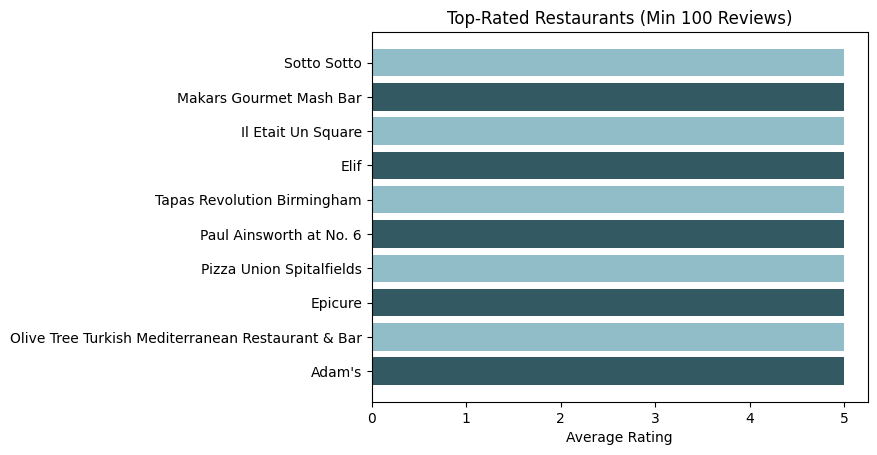

In [42]:
plt.figure()
plt.barh(top_rated["restaurant_name"], top_rated["avg_rating"], color = ["#90bdc8", "#335962"])
plt.xlabel("Average Rating")
plt.title("Top-Rated Restaurants (Min 100 Reviews)")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
"""
What this shows
    Horizontal bar chart of the 10 highest-rated restaurants
    All have perfect or near-perfect ratings
    Filtered to avoid small-sample bias

How to read it
    These restaurants represent consistent quality at scale
    Ideal benchmarks for service and food excellence

Insights (Top-Rated)
    UK dominates the top-rated list, especially England.
    Both fine dining (Epicure, Adam’s) and casual dining (Pizza Union, Elif) can achieve perfect ratings.
    High ratings + high reviews indicate consistent quality at scale, not niche popularity.
"""

In [36]:
# Most-reviewed restaurants
most_reviewed = (
    filtered_df.sort_values("total_reviews_count", ascending=False)
    .head(10)
)

most_reviewed[["restaurant_name", "city", "country", "avg_rating", "total_reviews_count"]]

,restaurant_name,city,country,avg_rating,total_reviews_count
206035,Aqua Shard,Unknown,United Kingdom,4.0,16401.0
53167,Le Bouillon Chartier,Paris,France,4.0,15188.0
196236,London Steakhouse Co.,Unknown,United Kingdom,4.0,14830.0
52788,Angelina,Paris,France,4.0,10702.0
54089,58 Tour Eiffel Restaurant,Paris,France,4.0,9837.0
209053,"Oxo Tower Restaurant, Bar and Brasserie",Unknown,United Kingdom,4.5,9444.0
59214,Les Grands Buffets,Narbonne,France,4.5,9036.0
202939,Shaka Zulu,Unknown,United Kingdom,3.5,8739.0
214688,Magpie Cafe,Whitby,United Kingdom,4.5,8284.0
209600,Hard Rock Cafe,Unknown,United Kingdom,4.0,8235.0


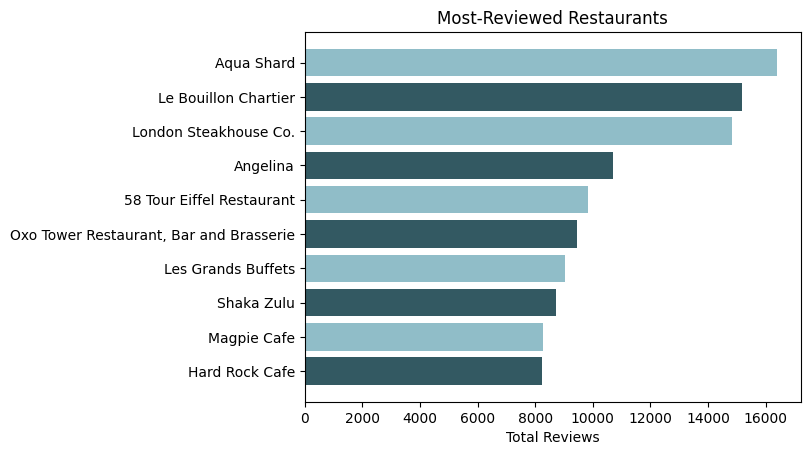

In [41]:
plt.figure()
plt.barh(most_reviewed["restaurant_name"], most_reviewed["total_reviews_count"], color = ["#90bdc8", "#335962"])
plt.xlabel("Total Reviews")
plt.title("Most-Reviewed Restaurants")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
"""
What this shows
    Restaurants with the highest total number of reviews
    Indicates footfall, visibility, and tourist appeal

How to read it
    High popularity does not necessarily imply the highest ratings
    Many are iconic, high-volume venues

Insights (Most-Reviewed)
    Paris strongly dominates the most-reviewed category.
    High review volume ≠ highest rating → popularity vs. quality distinction.
    Tourist-heavy and iconic venues (Hard Rock Cafe, Bouillon Chartier) generate massive review counts even with moderate ratings.
"""

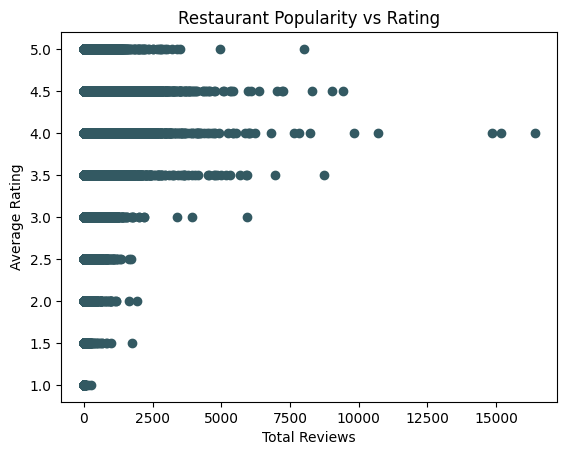

In [44]:
# --- Plot 3: Rating vs Reviews (scatter plot) ---
plt.figure()
plt.scatter(filtered_df["total_reviews_count"], filtered_df["avg_rating"], color = ["#335962"])
plt.xlabel("Total Reviews")
plt.ylabel("Average Rating")
plt.title("Restaurant Popularity vs Rating")
plt.show()

In [ ]:
"""
Plot 3: Rating vs. Total Reviews (Scatter Plot)

What this shows
    X-axis: total reviews (popularity)
    Y-axis: average rating (quality)

Key insights
    Weak correlation between popularity and rating
    Many highly rated restaurants have moderate review counts
    Very popular restaurants cluster around 4.0–4.5 ratings

Confirms two different success models:
⭐ Quality-driven
🔥 Volume-driven

"""

#### Most common cuisines and cuisine combinations

In [55]:
# Clean cuisines column

filtered_df = filtered_df.dropna(subset=["cuisines", "country"])
filtered_df["cuisines"] = filtered_df["cuisines"].astype(str)

# Split cuisines into lists
filtered_df["cuisine_list"] = filtered_df["cuisines"].str.split(",")
filtered_df["cuisine_list"] = filtered_df["cuisine_list"].apply(lambda x: [c.strip() for c in x])

results = {}

for country in filtered_df["country"].unique():
    df_c = filtered_df[filtered_df["country"] == country]

    # ---- Most common single cuisines ----
    all_cuisines = [c for sublist in df_c["cuisine_list"] for c in sublist]
    cuisine_counts = Counter(all_cuisines)
    top_cuisines = cuisine_counts.most_common(10)

    # Cuisine combinations

    combo_counter = Counter()
    
    for cuisines in df_c["cuisine_list"]:
        if len(cuisines) > 1:
            combo_counter.update(combinations(sorted(set(cuisines)), 2))

    combo_counts = combo_counter.most_common(10)

    results[country] = {
        "top_cuisines": top_cuisines,
        "top_combinations": combo_counts
    }

results

{'France': {'top_cuisines': [('French', 84643),
   ('European', 31729),
   ('Unknown', 22417),
   ('Italian', 16140),
   ('Pizza', 12529),
   ('Mediterranean', 10897),
   ('Asian', 9560),
   ('Fast food', 9129),
   ('Bar', 7745),
   ('Pub', 5983)],
  'top_combinations': [(('European', 'French'), 27310),
   (('Italian', 'Pizza'), 8464),
   (('French', 'Mediterranean'), 6257),
   (('Bar', 'French'), 6240),
   (('European', 'Mediterranean'), 4576),
   (('Bar', 'Pub'), 4354),
   (('French', 'Italian'), 4183),
   (('French', 'Pub'), 4043),
   (('Asian', 'Japanese'), 3889),
   (('Asian', 'Chinese'), 3591)]},
 'United Kingdom': {'top_cuisines': [('British', 64264),
   ('Cafe', 34735),
   ('Bar', 28771),
   ('Pub', 27657),
   ('Unknown', 24490),
   ('Fast food', 22133),
   ('Asian', 16415),
   ('Indian', 13097),
   ('Pizza', 10838),
   ('European', 10473)],
  'top_combinations': [(('Bar', 'Pub'), 24415),
   (('Bar', 'British'), 24175),
   (('British', 'Pub'), 22303),
   (('British', 'Cafe'), 1

In [ ]:
"""
Interpretation (France)
   - French cuisine overwhelmingly dominates, reflecting strong culinary tradition.
   - High presence of European and Mediterranean cuisines suggests:
       - Regional fusion
       - Tourist-oriented menus
   - Italian and Pizza cuisines are the most popular foreign influences.
   - Asian cuisine has a significant but secondary presence.

Key Insight (France)
- French restaurants often pair local identity with broad European positioning, 
    while Italian cuisine integrates strongly through pizza-focused concepts.

Interpretation (UK)
   - British cuisine dominates but is closely tied to:
       - Pub
       - Bar
   - Cafe culture
   - Indian cuisine is the strongest non-European influence, reflecting:
       - Cultural diversity
       - Long-standing demand
   - Fast food has a stronger presence than in France.

Key Insight (UK)

- The UK food scene is strongly shaped by hospitality-driven cuisine pairings, 
    with Indian and South Asian cuisines deeply integrated into mainstream dining.

"""

In [ ]:
"""

Cross-Country Comparison

    Aspect	                      France	                     United Kingdom

Dominant Cuisine	              French                           British
Strong Secondary	        European, Italian	                Cafe, Pub, Indian
Cultural Influence	        Traditional & regional	              Multicultural
Fusion Pattern	               European + French	            British + Pub / Bar
Foreign Cuisine Leader	          Italian	                         Indian

"""

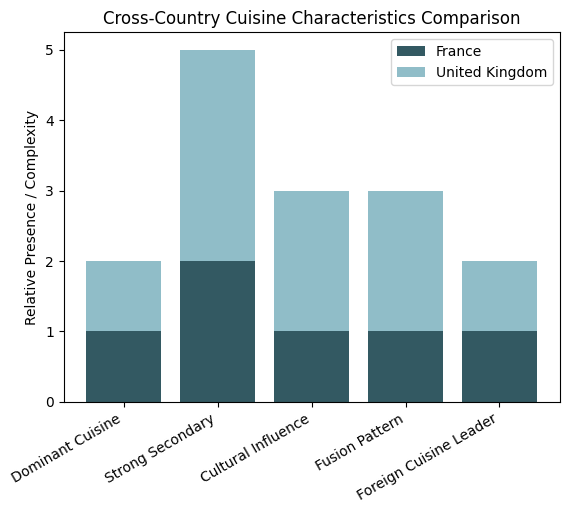

In [58]:
# Create comparison data for plotting

data = {
    "Aspect": [
        "Dominant Cuisine",
        "Strong Secondary",
        "Cultural Influence",
        "Fusion Pattern",
        "Foreign Cuisine Leader"
    ],
    "France": [1, 2, 1, 1, 1],
    "United Kingdom": [1, 3, 2, 2, 1]
}

df_cuisine = pd.DataFrame(data)

# Plot grouped bar chart
plt.figure()
x = range(len(df_cuisine["Aspect"]))

plt.bar(x, df_cuisine["France"], label="France", color = "#335962")
plt.bar(x, df_cuisine["United Kingdom"], bottom=df_cuisine["France"], label="United Kingdom", color = "#90bdc8")

plt.xticks(x, df_cuisine["Aspect"], rotation=30, ha="right")
plt.ylabel("Relative Presence / Complexity")
plt.title("Cross-Country Cuisine Characteristics Comparison")
plt.legend()
plt.show()

In [ ]:
"""

The chart uses encoded values to visualize relative complexity and diversity for each aspect. 
Since these variables are categorical, we encoded them to visualize relative complexity — 
the chart supports interpretation, not precise measurement.
Each bar represents the relative richness or variety of that aspect

Example:

Strong Secondary
    France → 2 (European, Italian)
    UK → 3 (Cafe, Pub, Indian)

Dominant Cuisine:
    - Both countries show strong national identity
    
Strong Secondary Cuisines
   - UK clearly shows greater variety
   - Indicates a more diverse supporting food culture

Cultural Influence
   - France: traditional & regional
   - UK: multicultural → visually higher

Fusion Pattern
   - UK shows more fusion complexity (British + Pub/Bar)
   - France remains more cuisine-identity driven

Foreign Cuisine Leader
   - Italy (France) vs Indian (UK)
   - Similar importance, different cultural roots

Key Takeaway:
France’s food culture is heritage-driven, while the UK’s is diversity-driven.

#### Indian Cuisine Distribution

In [68]:
# Clean cuisines

filtered_df = filtered_df.dropna(subset=["cuisines", "country"])
filtered_df["cuisines"] = filtered_df["cuisines"].astype(str)

# Check if Indian exists
filtered_df["is_Indian"] = filtered_df["cuisines"].str.contains("Indian", case = False, regex=False)

# Filter France & UK
df_indian = filtered_df[filtered_df["is_Indian"] & filtered_df["country"].isin(["France", "United Kingdom"])]

# Count by country
country_counts = (
    df_indian.groupby("country")
    .size()
    .reset_index(name="indian_restaurant_count")
)

# Top cities per country
city_counts = (
    df_indian[df_indian["city"] != "Unknown"]
    .groupby(["country", "city"])
    .size()
    .reset_index(name="count")
)
country_counts

,country,indian_restaurant_count
0,France,1674
1,United Kingdom,13097


In [69]:
city_counts

,country,city,count
0,France,Abbeville,2
1,France,Acheres,2
2,France,Agen,3
3,France,Aigues-Mortes,1
4,France,Aire-sur-l'Adour,1
...,...,...,...
2739,United Kingdom,Yelverton,1
2740,United Kingdom,Yeovil,9
2741,United Kingdom,York,38
2742,United Kingdom,Ystalyfera,1


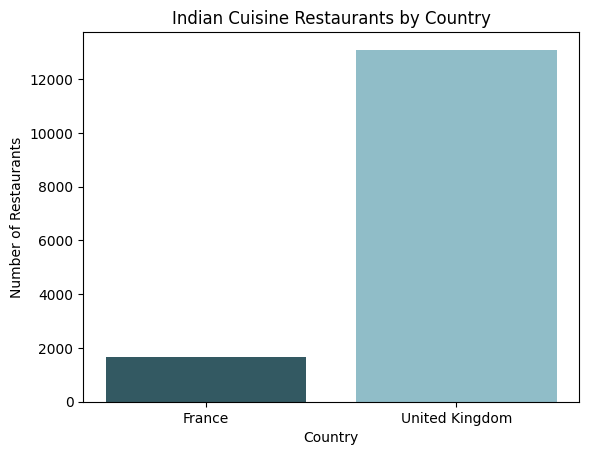

In [67]:
# Plot: Indian cuisine by country
plt.figure()
plt.bar(country_counts["country"], country_counts["indian_restaurant_count"], color = ["#335962", "#90bdc8"])
plt.title("Indian Cuisine Restaurants by Country")
plt.ylabel("Number of Restaurants")
plt.xlabel("Country")
plt.show()

In [ ]:
"""
Indian Restaurants by Country

Key numbers (approximate):
   - 🇬🇧 United Kingdom: ~13,000 Indian restaurants
   - 🇫🇷 France: ~1,700 Indian restaurants

Insight:
   - The UK has ~8× more Indian restaurants than France.
   - Indian cuisine is mainstream and deeply embedded in the UK food culture.
   - In France, Indian cuisine remains niche and urban-centered.
"""

In [64]:
top_cities_fr = city_counts[city_counts["country"] == "France"].sort_values("count", ascending=False).head(10)
top_cities_fr

,country,city,count
392,France,Paris,316
513,France,Toulouse,43
309,France,Lyon,38
324,France,Marseille,29
376,France,Nice,29
294,France,Lille,25
501,France,Strasbourg,22
368,France,Nantes,20
354,France,Montpellier,18
221,France,Grenoble,18


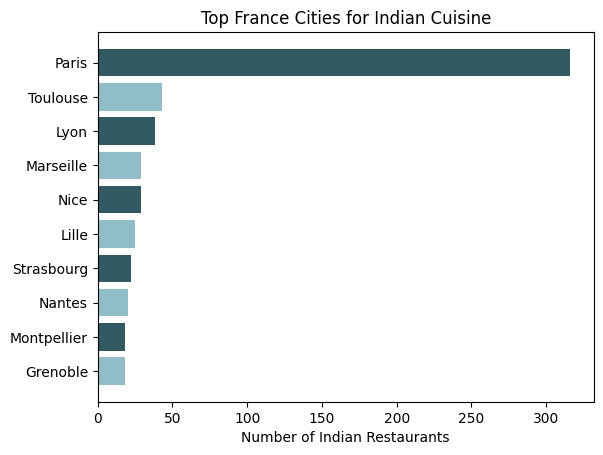

In [70]:
# Plot: Top France cities
plt.figure()
plt.barh(top_cities_fr["city"], top_cities_fr["count"], color = ["#335962", "#90bdc8"])
plt.title("Top France Cities for Indian Cuisine")
plt.xlabel("Number of Indian Restaurants")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
"""
France: City-Level Distribution

   - Paris alone accounts for a large share of Indian restaurants
   - Secondary presence in:
       - Major metropolitan areas
       - Student & tourist cities
   - Very limited penetration beyond big cities

Indian cuisine in France is capital-centric and exploratory, not yet mainstream.
"""

In [65]:
top_cities_uk = city_counts[city_counts["country"] == "United Kingdom"].sort_values("count", ascending=False).head(10)
top_cities_uk

,country,city,count
774,United Kingdom,Birmingham,325
1723,United Kingdom,Leicester,211
1834,United Kingdom,Manchester,175
1721,United Kingdom,Leeds,114
2273,United Kingdom,Sheffield,108
1999,United Kingdom,Nottingham,103
835,United Kingdom,Bradford,96
1457,United Kingdom,Harrow,94
952,United Kingdom,Cardiff,93
1954,United Kingdom,Newcastle upon Tyne,90


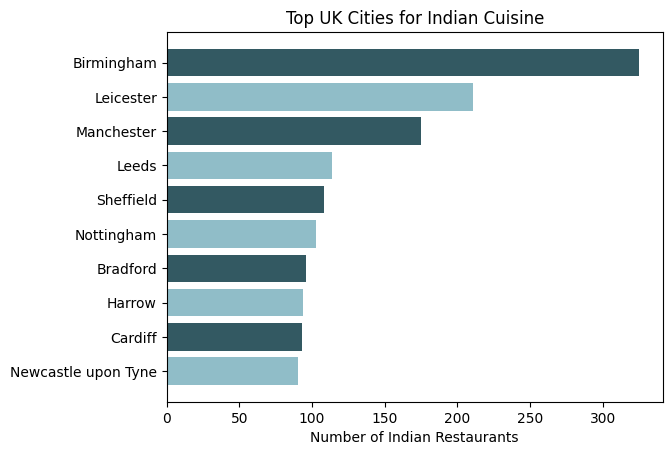

In [71]:
# Plot: Top UK cities
plt.figure()
plt.barh(top_cities_uk["city"], top_cities_uk["count"], color = ["#335962", "#90bdc8"])
plt.title("Top UK Cities for Indian Cuisine")
plt.xlabel("Number of Indian Restaurants")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
"""
United Kingdom: City-Level Distribution
   - Birmingham – clear leader
   - Strong correlation with:
       - Historical South Asian communities
       - Industrial & multicultural cities
   - Birmingham & Leicester are known Indian cuisine hubs
   - Distribution is geographically widespread, not London-only

Unlike France, Indian cuisine in the UK is community-driven, not tourist-driven.

For new investors, UK will be Highly competitive but they will find more growth opportunities in France.
"""

#### Distribution of Vegetarian Restaurants in France & UK

In [83]:
filtered_df["vegetarian_friendly"].unique()

array(['N', 'Y'], dtype=object)

In [88]:
# Filter Vegetarian food options
filtered_df["vegetarian_friendly"] = filtered_df["vegetarian_friendly"].astype(str)

# Filter vegetarian restaurants
veg_df = filtered_df[filtered_df["vegetarian_friendly"] == "Y"]

# Country-level counts
veg_country = (
    veg_df.groupby("country")
    .size()
    .reset_index(name="vegetarian_restaurant_count")
)

# Percentage of vegetarian restaurants per country
total_country = filtered_df.groupby("country").size().reset_index(name="total_restaurants")
veg_country = veg_country.merge(total_country, on="country")
veg_country["percentage"] = (
    veg_country["vegetarian_restaurant_count"] / veg_country["total_restaurants"] * 100
)

# Top cities per country
veg_city = (
    veg_df[veg_df["city"] != "Unknown"]
    .groupby(["country", "city"])
    .size()
    .reset_index(name="count")
)

In [85]:
veg_country

,country,vegetarian_restaurant_count,total_restaurants,percentage
0,France,26070,155288,16.788161
1,United Kingdom,75911,171664,44.220687


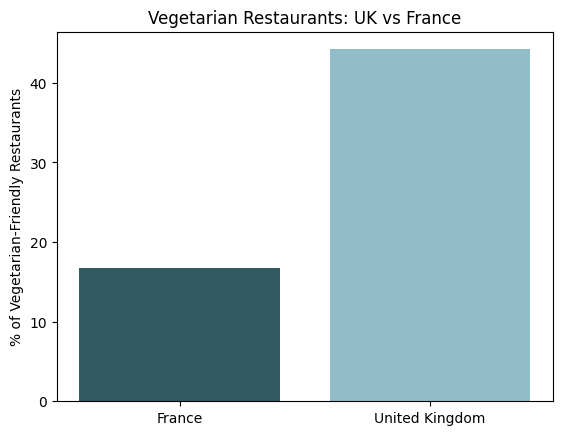

In [94]:
# --- Plot 1: Country-level comparison ---
plt.figure()
plt.bar(veg_country["country"], veg_country["percentage"], color = ["#335962", "#90bdc8"])
plt.ylabel("% of Vegetarian-Friendly Restaurants")
plt.title("Vegetarian Restaurants: UK vs France")
plt.show()

In [ ]:
"""
Key Insight:
   - The UK has nearly 3× more vegetarian-friendly restaurants than France.
   - Almost 1 in 2 restaurants in the UK offers vegetarian options.
   - In France, vegetarian dining is still niche, with fewer than 1 in 5 restaurants being vegetarian-friendly.
"""

In [86]:
top_veg_uk = veg_city[veg_city["country"] == "United Kingdom"].sort_values("count", ascending=False).head(10)
top_veg_uk

,country,city,count
4743,United Kingdom,Birmingham,862
8178,United Kingdom,Manchester,759
7872,United Kingdom,Liverpool,681
9561,United Kingdom,Sheffield,596
7744,United Kingdom,Leeds,580
5021,United Kingdom,Brighton,541
5270,United Kingdom,Cardiff,505
8566,United Kingdom,Newcastle upon Tyne,494
8700,United Kingdom,Nottingham,461
11074,United Kingdom,York,397


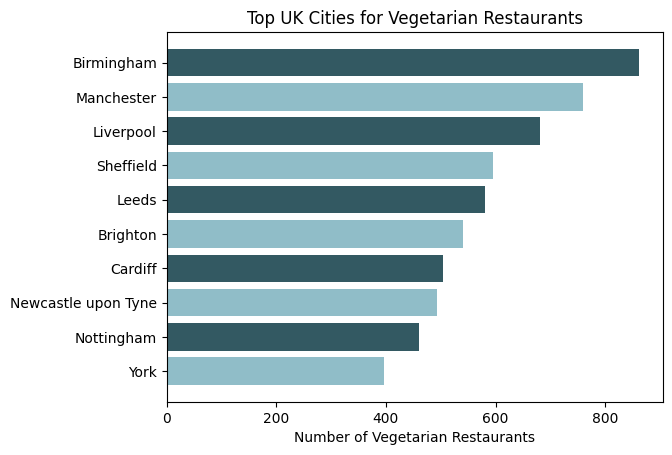

In [99]:
# --- Plot 2: Top UK Cities for Vegetarian Restaurants ---
plt.figure()
plt.barh(top_veg_uk["city"].head(10), top_veg_uk["count"].head(10), color = ["#335962", "#90bdc8"])
plt.xlabel("Number of Vegetarian Restaurants")
plt.title("Top UK Cities for Vegetarian Restaurants")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
"""
Interpretation (UK):
   - Vegetarian options are widely distributed, not limited to London.
   - Strong presence in:
       - Student cities (Leeds, Sheffield, Nottingham)
       - Progressive & lifestyle-driven cities (Brighton)
"""

In [87]:
top_veg_fr = veg_city[veg_city["country"] == "France"].sort_values("count", ascending=False).head(10)
top_veg_fr

,country,city,count
2670,France,Paris,4388
2545,France,Nice,554
2158,France,Lyon,515
2231,France,Marseille,401
440,France,Bordeaux,369
3801,France,Toulouse,334
3708,France,Strasbourg,280
2440,France,Montpellier,258
2075,France,Lille,247
2510,France,Nantes,235


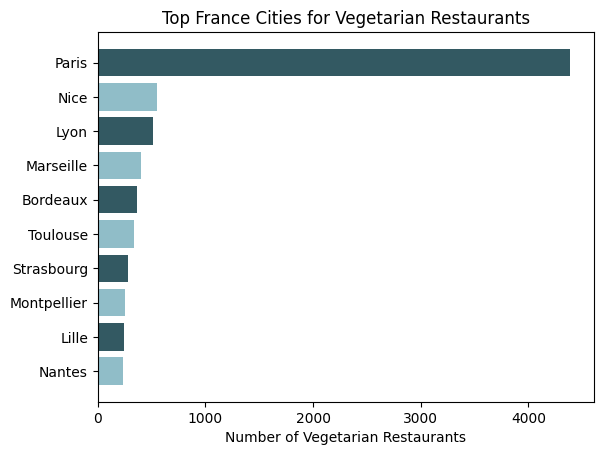

In [100]:
# --- Plot 3: Top France Cities for Vegetarian Restaurants ---
plt.figure()
plt.barh(top_veg_fr["city"].head(10), top_veg_fr["count"].head(10), color = ["#335962", "#90bdc8"])
plt.xlabel("Number of Vegetarian Restaurants")
plt.title("Top France Cities for Vegetarian Restaurants")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
"""
Interpretation (France):
   - Paris dominates vegetarian dining in France.
   - Outside Paris, vegetarian restaurants are:
       - Concentrated in large cities
       - Often linked to tourism and student populations
"""

In [ ]:
"""
For Investors
   - UK vegetarian market = stable, mature
   - France vegetarian market = expansion opportunity
"""

#### Top 10 Vegetarian Restaurants 

In [140]:
# Ensure numeric

filtered_df["avg_rating"] = pd.to_numeric(filtered_df["avg_rating"], errors="coerce")
filtered_df["total_reviews_count"] = pd.to_numeric(filtered_df["total_reviews_count"], errors="coerce")

# Filter vegetarian restaurants
filtered_df["vegetarian_friendly"] = filtered_df["vegetarian_friendly"].astype(str).str.lower()

In [141]:
# --- Top 10 Vegetarian in UK ---

# Filter vegetarian-friendly restaurants in the UK
uk_veg = filtered_df[
    (filtered_df["country"] == "United Kingdom") &
    (filtered_df["vegetarian_friendly"] == "y")
]

# Drop rows with missing rating or review count
uk_veg = uk_veg.dropna(subset=["avg_rating", "total_reviews_count"])

# Minimum reviews threshold for reliability
MIN_REVIEWS = 50
uk_veg = uk_veg[uk_veg["total_reviews_count"] >= MIN_REVIEWS]

top_uk_veg = uk_veg.sort_values(
    ["avg_rating", "total_reviews_count"],
    ascending=[False, False]
).head(10)

# Display results
top_uk_veg[["restaurant_name", "city", "cuisines", "avg_rating", "total_reviews_count"]]

,restaurant_name,city,cuisines,avg_rating,total_reviews_count
220978,Sotto Sotto,Bath,"Italian, Mediterranean, European, Soups",5.0,8005.0
188568,Elif,Liverpool,"Mediterranean, Barbecue, Turkish, Healthy, Mid...",5.0,3374.0
226903,Tapas Revolution Birmingham,Birmingham,"Mediterranean, European, Spanish, Healthy, Cat...",5.0,3222.0
206170,Pizza Union Spitalfields,Unknown,"Pizza, Fast food",5.0,2939.0
248311,Olive Tree Turkish Mediterranean Restaurant & Bar,Milton Keynes,Turkish,5.0,2790.0
226985,Adam's,Birmingham,"European, British",5.0,2782.0
186309,Yorkshire Fisheries,Blackpool,"Seafood, Fast food, British",5.0,2722.0
275196,The Shalimar,Matlock,"Indian, Asian, Balti",5.0,2517.0
194809,Bar 61 Restaurant,Unknown,"Mediterranean, European, Spanish",5.0,2503.0
324531,Vita Bella,East Hanningfield,"Italian, Mediterranean",5.0,2375.0


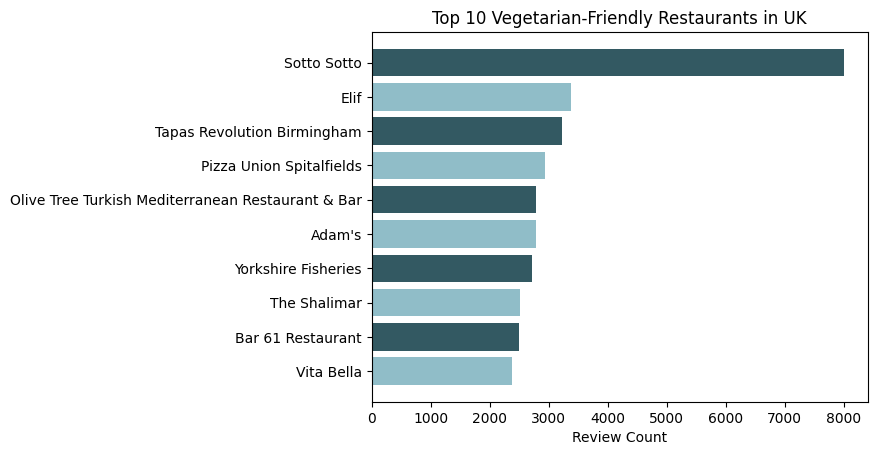

In [153]:
# Plot horizontal bar chart
plt.figure()
plt.barh(top_uk_veg["restaurant_name"], top_uk_veg["total_reviews_count"], color = ["#335962", "#90bdc8"])
plt.xlabel("Review Count")
plt.title("Top 10 Vegetarian-Friendly Restaurants in UK")
plt.gca().invert_yaxis()
plt.show()

In [146]:
# --- Top 10 Vegetarian in France ---
fr_veg = filtered_df[(filtered_df["country"] == "France") &
    (filtered_df["vegetarian_friendly"] == "y")]

# Drop missing ratings/reviews
fr_veg = fr_veg.dropna(subset=["avg_rating", "total_reviews_count"])

# Apply minimum review threshold
fr_veg = fr_veg[fr_veg["total_reviews_count"] >= 50]

top_fr_veg = fr_veg.sort_values(
    ["avg_rating", "total_reviews_count"],
    ascending=[False, False]
).head(10)

top_fr_veg[["restaurant_name", "city", "primary_cuisine", "avg_rating", "total_reviews_count"]]

,restaurant_name,city,primary_cuisine,avg_rating,total_reviews_count
52353,Il Etait Un Square,Paris,French,5.0,3483.0
39345,Les Apotres de Pigalle,Paris,South American,5.0,2231.0
50697,New Jawad Longchamp,Paris,Indian,5.0,2159.0
33874,Bergamote,Saint-Malo,French,5.0,1649.0
21517,Restaurant Le Santana,Sagone,French,5.0,1553.0
96144,Maison Lameloise,Chagny,French,5.0,1543.0
67812,Bistrot Des Ducs,Angers,French,5.0,1508.0
56553,Boutary,Paris,French,5.0,1190.0
79755,O'Bidul,Marseille,French,5.0,1112.0
138120,Restaurant La Maison d'à Côté,Montlivault,French,5.0,1084.0


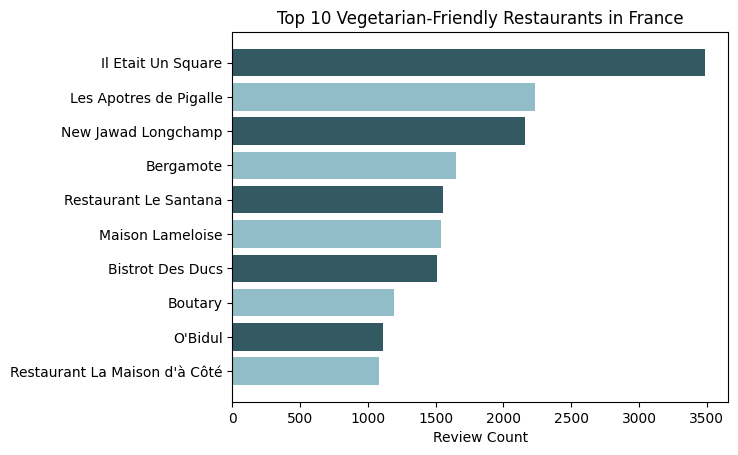

In [152]:
# Plot horizontal bar chart
plt.figure()
plt.barh(top_fr_veg["restaurant_name"], top_fr_veg["total_reviews_count"], color = ["#335962", "#90bdc8"])
plt.xlabel("Review Count")
plt.title("Top 10 Vegetarian-Friendly Restaurants in France")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
"""
- 7 out of 10 restaurants list French / European cuisine.
- Indicates that in France, vegetarian excellence is achieved within traditional culinary frameworks, 
    not only in niche vegetarian concepts.
- Indian / Asian cuisine appears in the top 3
"""

#### Top 10 Indian Restaurants in France & UK

In [166]:
# Clean fields

filtered_df["avg_rating"] = pd.to_numeric(filtered_df["avg_rating"], errors="coerce")
filtered_df["total_reviews_count"] = pd.to_numeric(filtered_df["total_reviews_count"], errors="coerce")
filtered_df["cuisines"] = filtered_df["cuisines"].astype(str)

# Filter Indian cuisine
indian_df = filtered_df[filtered_df["cuisines"].str.contains("Indian", case=False, regex=False)]

# Remove rows with missing ratings or reviews
indian_df = indian_df.dropna(subset=["avg_rating", "total_reviews_count"])

# Reliability filter
indian_df = indian_df[indian_df["total_reviews_count"] >= 50]

In [167]:
# Top 10 France
top_fr = (
    indian_df[indian_df["country"] == "France"]
    .sort_values(["avg_rating", "total_reviews_count"], ascending=[False, False])
    .head(10)
)

top_fr[["restaurant_name","city","avg_rating","total_reviews_count"]]

,restaurant_name,city,avg_rating,total_reviews_count
50697,New Jawad Longchamp,Paris,5.0,2159.0
41412,Mayfair Garden,Paris,5.0,896.0
133517,Bhameshwari Indian Restaurant,Draveil,5.0,645.0
53070,Joyti Restaurant,Paris,5.0,494.0
75312,Cumin et Cannelle,Nice,5.0,472.0
6989,Restaurant Annapurna,Courcouronnes,5.0,451.0
132586,"Tsaretta Spice, Méribel",Meribel,5.0,211.0
63143,Curry Cafe,Toulouse,5.0,197.0
82002,Su's Cuisine,Chamonix,5.0,179.0
122072,Smrity Mahal Restaurant,Aubervilliers,5.0,150.0


In [168]:
# Top 10 UK
top_uk = (
    indian_df[indian_df["country"] == "United Kingdom"]
    .sort_values(["avg_rating", "total_reviews_count"], ascending=[False, False])
    .head(10)
)

top_uk[["restaurant_name","city","avg_rating","total_reviews_count"]]

,restaurant_name,city,avg_rating,total_reviews_count
275196,The Shalimar,Matlock,5.0,2517.0
243101,Obsession Of India,Unknown,5.0,2207.0
182936,Kohinoor Of Kerala,Southampton,5.0,2026.0
223705,Simla Restaurant,Newcastle upon Tyne,5.0,1666.0
181367,Prithvi,Cheltenham,5.0,1459.0
239971,Pataka,Unknown,5.0,1402.0
229612,Mumtaz Leeds,Leeds,5.0,1361.0
211775,Taste Of Nawab,Unknown,5.0,1288.0
181486,East India Cafe,Cheltenham,5.0,1281.0
156070,Royal Balti House,Farnworth,5.0,1260.0


#### Language Distribution 

In [169]:
# Ensure languages column is string
filtered_df["default_language"] = filtered_df["default_language"].astype(str)

# Remove missing / unknown values
df_lang = filtered_df[~filtered_df["default_language"].isin(["Unknown", "nan", "None"])]

# Split languages into lists
df_lang["language_list"] = df_lang["default_language"].str.split(",")

# Strip whitespace
df_lang["language_list"] = df_lang["language_list"].apply(
    lambda x: [lang.strip() for lang in x]
)

# Function to get top languages per country
def top_languages_by_country(country, top_n=10):
    langs = df_lang[df_lang["country"] == country]["language_list"]
    all_langs = [l for sublist in langs for l in sublist]
    return Counter(all_langs).most_common(top_n)

C:\Users\Janak ARORA\AppData\Local\Temp\ipykernel_32624\3122245997.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lang["language_list"] = df_lang["default_language"].str.split(",")
C:\Users\Janak ARORA\AppData\Local\Temp\ipykernel_32624\3122245997.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lang["language_list"] = df_lang["language_list"].apply(


In [170]:
top_lang_france = top_languages_by_country("France")
top_lang_france

[('English', 88066), ('All languages', 56583)]

In [171]:
top_lang_uk = top_languages_by_country("United Kingdom")
top_lang_uk

[('English', 158309), ('All languages', 219)]

In [177]:
# Clean language column
filtered_df["default_language"] = filtered_df["default_language"].astype(str).str.lower()

# Filter France & UK
df_countries = filtered_df[filtered_df["country"].isin(["France", "United Kingdom"])]

# Identify English-language restaurants
df_countries["is_english"] = df_countries["default_language"].str.contains("english")

# Count English-language restaurants
english_counts = (
    df_countries[df_countries["is_english"]]
    .groupby("country")
    .size()
    .reset_index(name="english_restaurants")
)

# Total restaurants per country
total_counts = (
    df_countries.groupby("country")
    .size()
    .reset_index(name="total_restaurants")
)

# Merge and calculate percentage
lang_distribution = english_counts.merge(total_counts, on="country")
lang_distribution["percentage"] = (
    lang_distribution["english_restaurants"] / lang_distribution["total_restaurants"] * 100
)
lang_distribution

,country,english_restaurants,total_restaurants,percentage
0,France,88066,155288,56.711401
1,United Kingdom,158309,171664,92.220267


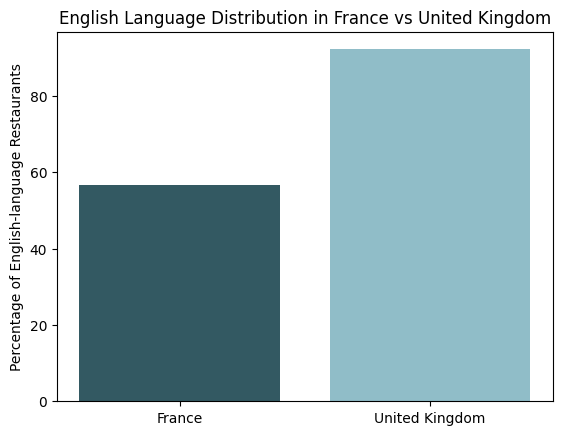

In [178]:
# Plot
plt.figure()
plt.bar(lang_distribution["country"], lang_distribution["percentage"], color = ["#335962", "#90bdc8"])
plt.ylabel("Percentage of English-language Restaurants")
plt.title("English Language Distribution in France vs United Kingdom")
plt.show()

In [ ]:
"""
United Kingdom: ~92% of restaurants use English
France: ~57% of restaurants use English

United Kingdom
   - English is the default operating language for restaurants.
   - High percentage reflects:
       - Native language dominance
       - Strong accessibility for international users
       - Consistent platform standardization

France
   - English is widely used but not dominant.
   - Indicates:
       - Strong national language identity (French)
       - English adoption driven by tourism and international audiences
       - More bilingual or localized restaurant communication

While presenting:
“English-language usage highlights how restaurants position themselves for international audiences. 
    The UK is nearly universal, while France shows selective adoption driven by tourism.”
"""

## HYPOTHESIS TESTING

### 1. English Language Distribution (France vs UK)

#### Research Question: Is there a statistically significant difference in the proportion of restaurants using English as the default language between France and the UK?

##### Null hypothesis (H₀):
##### There is no association between country (France vs UK) and English-language usage in restaurants.

##### Alternative hypothesis (H₁):
##### There is an association between country and English-language usage.

In [180]:
# Clean language column
filtered_df["default_language"] = filtered_df["default_language"].astype(str).str.lower()

# Focus on France & UK
filtered_df = filtered_df[filtered_df["country"].isin(["France", "United Kingdom"])]

# Create English vs Non-English flag
filtered_df["is_english"] = filtered_df["default_language"].str.contains("english")

# Build contingency table
contingency = pd.crosstab(filtered_df["country"], filtered_df["is_english"])

# Perform Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency)

contingency, chi2, p_value

(is_english      False   True 
 country                      
 France          67222   88066
 United Kingdom  13355  158309,
 np.float64(55354.38309263287),
 np.float64(0.0))

In [ ]:
"""
Statistical Test Used:
    Chi-square test of independence

Appropriate because:
   - Variables are categorical (country, language)
   - Large sample size
   - Independence assumption holds

Since p < 0.05, we reject the null hypothesis.

Language choice reflects cultural orientation:
    UK → global accessibility
    France → balance between identity and tourism

Platforms and restaurant owners should:
   - Expect English by default in the UK
   - Use English selectively in France (tourist areas)
"""

### 2. Vegetarian Adoption

#### Research Question

#### Is there a statistically significant difference in the adoption of vegetarian-friendly restaurants between France and the UK?

##### Null hypothesis (H₀):
##### Vegetarian adoption is independent of country (France and UK have similar proportions).

##### Alternative hypothesis (H₁):
##### Vegetarian adoption differs by country.

In [181]:
# Clean vegetarian flag
filtered_df["vegetarian_friendly"] = filtered_df["vegetarian_friendly"].astype(str).str.lower()

# Focus on France & UK
filtered_df = filtered_df[filtered_df["country"].isin(["France", "United Kingdom"])]

# Vegetarian vs non-vegetarian
filtered_df["is_vegetarian"] = filtered_df["vegetarian_friendly"] == "y"

# Contingency table
contingency = pd.crosstab(filtered_df["country"], filtered_df["is_vegetarian"])

# Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency)

contingency, chi2, p_value

(is_vegetarian    False  True 
 country                      
 France          129218  26070
 United Kingdom   95753  75911,
 np.float64(28586.92787244478),
 np.float64(0.0))

In [ ]:
"""
Statistical Test Used:
    Chi-square test of independence

Suitable because:
    Variables are categorical
    Large sample size
    Independence assumption satisfied

Since p < 0.05, we reject the null hypothesis.

- Vegetarian adoption is strongly associated with country.
- The UK has institutionalized vegetarian dining, while France is in a growth phase.

While presenting:
I tested whether vegetarian adoption differs by country and found a highly significant association, 
    confirming that cultural context strongly influences dietary offerings.”
"""

### 3. Indian Restaurant Presence

#### Research Question
##### Is there a statistically significant difference in the presence of Indian restaurants between France and the UK?

##### Null hypothesis (H₀):
##### The presence of Indian restaurants is independent of country (France and the UK have similar proportions).

##### Alternative hypothesis (H₁):
##### The presence of Indian restaurants depends on country.

In [182]:
# Data cleaning
filtered_df["cuisines"] = filtered_df["cuisines"].astype(str)

# Focus only on France & UK
filtered_df = filtered_df[filtered_df["country"].isin(["France", "United Kingdom"])]

# Create Indian cuisine flag
filtered_df["is_indian"] = filtered_df["cuisines"].str.contains("Indian", case=False, regex=False)

# Contingency table
contingency_table = pd.crosstab(filtered_df["country"], filtered_df["is_indian"])

# Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# results
contingency_table, chi2, p_value

(is_indian        False  True 
 country                      
 France          153614   1674
 United Kingdom  158567  13097,
 np.float64(8111.05293643888),
 np.float64(0.0))

In [ ]:
"""
Statistical Test:
   - Chi-square test of independence
   - Appropriate because:
       - Both variables are categorical
       - Large sample size
       - Independence assumption satisfied

Since p < 0.05, we reject the null hypothesis.

Practical Significance:
   - The UK has ~8× more Indian restaurants than France

Reflects:
   - Migration history
   - Cultural integration
   - Vegetarian compatibility
   - Consumer familiarity

Our hypothesis test confirms that Indian cuisine is deeply embedded in the UK restaurant market, 
while remaining a niche offering in France
"""